# Libraries

In [1]:
import os
import pickle
from functools import reduce
from operator import mul

import pandas as pd
import numpy as np

from statsmodels.regression.linear_model import OLS
from sklearn import linear_model
from sklearn.decomposition import PCA

import holoviews as hv
import hvplot
import hvplot.pandas

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
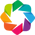

In [2]:
np.random.seed(42)
hv.extension('bokeh')

In [3]:
# There is a compatilibility issue with this library \
#and newer versions of Pandas, this is short fix to the problem, \
#if you have issues at this chunk comment it out and you should be fine.  
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web

/home/haininhhoang94/anaconda3/envs/pyds/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Porfolio Data

In [4]:
portfolio_path = os.path.join("100_Portfolios_10x10_Daily.p")

In [5]:
# To download the data yourself
try:
    portfolios = pickle.load(open( portfolio_path, "rb" ))
except:
    portfolios = web.DataReader('100_Portfolios_10x10_Daily', 'famafrench')
    pickle.dump(portfolio_path, open(portfolio_path, "wb"))

In [6]:
print(portfolios['DESCR'])

100 Portfolios 10x10 Daily
--------------------------

This file was created by CMPT_ME_BEME_RETS_DAILY using the 202006 CRSP database. It contains value-weighted returns for the intersections of 10 ME portfolios and 10 BE/ME portfolios. The portfolios are constructed at the end of June. ME is market cap at the end of June. BE/ME is book equity at the last fiscal year end of the prior calendar year divided by ME at the end of December of the prior year. Missing data are indicated by -99.99 or -999. The break points use Compustat firms plus the firms hand-collected from the Moodys Industrial, Transportation, Utilities, and Financials Manuals. The portfolios use Compustat firms plus the firms hand-collected from the Moodys Industrial, Transportation, Utilities, and Financials Manuals. Copyright 2020 Kenneth R. French

  0 : Average Value Weighted Returns -- Daily (1235 rows x 100 cols)
  1 : Average Equal Weighted Returns -- Daily (1235 rows x 100 cols)
  2 : Number of Firms in Portfolio

![Fama/French Benchmark Portfolio](../Media/fama-french-benchmark-portfolios.png)

In [7]:
pd.melt(portfolios[1].head(100).divide(100).add(1).cumprod().reset_index(), 
        id_vars='Date').hvplot.line(x='Date', by='variable')

:NdOverlay   [variable]
   :Curve   [Date]   (value)

In [8]:
portfolios[1] = portfolios[1].divide(100)

# Factors Data

In [9]:
five_factor_path = os.path.join("F-F_Research_Data_5_Factors_2x3_daily.p")

In [10]:
# To download the data yourself
try:
    factors = pickle.load(open( five_factor_path, "rb" ))
except:
    factors = web.DataReader('F-F_Research_Data_5_Factors_2x3_daily', 'famafrench')
    pickle.dump(five_factor_path, open( five_factor_path, "wb"))

In [11]:
print(factors['DESCR'])

F-F Research Data 5 Factors 2x3 daily
-------------------------------------

This file was created by CMPT_ME_BEME_OP_INV_RETS_DAILY using the 202006 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc.

  0 : (1235 rows x 6 cols)


In [12]:
pd.melt(factors[0].head(100).divide(100).add(1).cumprod().reset_index(), 
        id_vars='Date').hvplot.line(x='Date', by='variable')

:NdOverlay   [variable]
   :Curve   [Date]   (value)

## i. Covariance of Factors

In [13]:
factors[0] = factors[0].loc[portfolios[1].index,:].divide(100)
hvplot.scatter_matrix(factors[0])

:GridMatrix   [X,Y]
   :Histogram   [SMB]   (SMB_frequency)

In [14]:
pca_factors = PCA()
pca_factors.fit(factors[0].dropna())

pd.Series(pca_factors.explained_variance_ratio_,name='Variance_Explained').hvplot.line(label='Scree Plot of PCA Variance Explaned (%)').redim(Variance_Explained={'range': (0, 1)})

:Curve   [index]   (Variance_Explained)

# Modeling

In [15]:
# We must make sure we have an overlapping dataset
dates = np.intersect1d(factors[0].index, portfolios[1].index)
factors[0] = factors[0].loc[dates,:]
portfolios[1] = portfolios[1].loc[dates,:]

## ii. Analyzing Weight Space

In [16]:
factors[0] = factors[0].loc[~factors[0].isna().any(1)&~portfolios[1].isna().any(1),:]
portfolios[1] = portfolios[1].loc[~factors[0].isna().any(1)&~portfolios[1].isna().any(1),:]


In [17]:
lm = linear_model.LinearRegression(normalize=True)
lm.fit(X=factors[0], y=portfolios[1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
pca = PCA(n_components=2)

beta_comp = pca.fit_transform(lm.coef_)
beta_comp = pd.DataFrame(beta_comp, columns=['weight_comp1','weight_comp2'], index=portfolios[1].columns)
beta_comp = beta_comp.reset_index()

labels = pd.Series(portfolios[1].columns).str.split(' ', 1, expand=True)
labels.columns = ['market equity','two']

beta_comp = pd.concat([beta_comp,labels], axis=1)

print(f'This is the feature importance of our two components: \n\n{pca.explained_variance_ratio_}s')

This is the feature importance of our two components: 

[0.98974442 0.00462441]s


In [19]:
%%opts Scatter [tools=['hover'], height=400, width=600] (size=5 alpha=0.5)
hv.Scatter(beta_comp, kdims = ['weight_comp1'], vdims = ['weight_comp2', 'market equity', 'two']).options(color_index='market equity') + \
hv.Scatter(beta_comp, kdims = ['weight_comp1'], vdims = ['weight_comp2', 'market equity', 'two']).options(color_index='two')

:Layout
   .Scatter.I  :Scatter   [weight_comp1]   (weight_comp2,market equity,two)
   .Scatter.II :Scatter   [weight_comp1]   (weight_comp2,market equity,two)

## iii. Testing Significance of F-F 5-Factor

In [20]:
portfolio_returns = pd.melt(portfolios[1].reset_index(), id_vars='Date').drop(columns=['variable']).merge(factors[0].dropna(), how='left', on='Date').drop(columns=['Date'])

portfolio_returns.head()

value  Mkt-RF     SMB     HML     RMW     CMA   RF
0 -0.0029  0.0036 -0.0007 -0.0045  0.0001 -0.0006  0.0
1 -0.0194 -0.0088 -0.0037  0.0199  0.0023  0.0074  0.0
2 -0.0153 -0.0036 -0.0040 -0.0035  0.0032  0.0018  0.0
3  0.0041  0.0132  0.0019  0.0069  0.0022  0.0004  0.0
4 -0.0056 -0.0098 -0.0006  0.0043  0.0010  0.0008  0.0

In [21]:
model = OLS(portfolio_returns.value-portfolio_returns.RF,portfolio_returns.drop(columns=['value','RF']))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.763
Model:                            OLS   Adj. R-squared (uncentered):              0.763
Method:                 Least Squares   F-statistic:                          7.966e+04
Date:                Mon, 03 Aug 2020   Prob (F-statistic):                        0.00
Time:                        16:06:06   Log-Likelihood:                      4.1672e+05
No. Observations:              123500   AIC:                                 -8.334e+05
Df Residuals:                  123495   BIC:                                 -8.334e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         1.0132      0.002    489.480      0.000       1.009       1.017
SMB            0.6796      0.004    164.086      0.000       0.671       0.688
HML            0.3047      0.004     77.155      0.000       0.297       0.312
RMW           -0.0718      0.006    -11.185      0.000      -0.084      -0.059
CMA           -0.1088      0.008    -13.483      0.000      -0.125      -0.093
==============================================================================
Omnibus:                    86936.926   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         38757581.849
Skew:                           2.191   Prob(JB):                         0.00
Kurtosis:                      89.676   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""